# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

**Reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating)**

In [4]:
import spacy

nlp = spacy.load('en_core_web_lg')

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [2]:
nlp.vocab['cheese'].vector

array([ 1.3884e+00, -1.3481e+00, -1.7638e+00, -3.2299e-01,  2.8968e+00,
       -3.4742e+00,  1.5614e+00,  4.1019e+00, -2.3339e+00,  7.7066e-01,
        5.4667e+00, -4.3539e+00,  2.1411e+00,  1.0337e+00,  2.1333e+00,
       -5.2507e+00, -8.4292e-01,  1.6601e+00,  8.0711e-01, -1.3815e+00,
       -3.0533e+00,  1.3261e+00, -1.5997e+00,  9.7612e-01, -4.8395e+00,
       -1.1163e+00, -5.6145e+00,  2.0262e+00, -1.7511e+00, -3.1134e+00,
        1.3560e+00, -6.7027e-01, -9.2217e-02, -1.5939e+00, -1.1572e+00,
       -3.2397e+00,  2.8394e+00,  1.9167e+00, -1.8530e+00,  9.4867e-01,
        7.9217e-01,  2.8105e-01,  2.3105e+00, -2.0119e+00,  3.6931e+00,
       -2.1588e+00,  9.3177e-01,  2.4037e-01, -1.9010e+00,  5.0660e-01,
        1.3864e-01,  3.2558e-01, -7.1408e-01, -1.5416e+00, -1.7270e-01,
       -3.7842e+00, -8.8674e-01,  3.5418e+00,  5.5733e+00,  2.0573e+00,
        3.4798e+00, -1.4878e+00,  3.5792e+00,  1.6799e+00,  1.9810e+00,
        4.5659e-01, -4.8671e+00, -1.0939e+00,  1.8729e+00,  3.80

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [5]:
# TODO: Enter your implementation of `most_similar` here

import numpy as np

def most_similar(x):
    keys, best_rows, scores = nlp.vocab.vectors.most_similar(np.asarray([x]), n = 10)
    ms_result = []
    for i in keys[0]:
        ms_result.append(nlp.vocab[i])
    return ms_result

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [4]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector)))

cheese cheesed cheesey cheeses headcheese cheesesteak -St cheesesteaks -Cheese theese


In [5]:
print(' '.join(w.text for w in most_similar(nlp.vocab['burger'].vector)))

burger hamburger cheeseburger Fatburger burgers Bitburger Whataburger Cheeseburger hamburgers cheeseburgers


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [6]:
# TODO: Insert code here to generate your examples

print(' '.join(w.text for w in most_similar(nlp.vocab['angry'].vector))) #synonymy

print(' '.join(w.text for w in most_similar(nlp.vocab['male'].vector))) #antonymy

print(' '.join(w.text for w in most_similar(nlp.vocab['jeans'].vector))) #hyponymy

angry upset annoyed jealous Hangry scared embarrassed unhappy unembarrassed hangry
male female male- /female male(s)/female Yixuan fema females Aumale males
jeans denim pantsuits leggings trousers sweatpants pants jean pantsuit waistcoats


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [7]:
# TODO: Write code here to plot the most similar words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



def plot_most_similar(word):
    
    #convert generator object to list of spacy lexemes
    word = list(word)
    
    #find most similar words to each word in list
    ms_words = ([most_similar(lex.vector) for lex in word])
    
    #append most similar words to word list 
    ms_words_concat = np.append(word, ms_words)
    
    #vectorize the word list before dimensionality reduction
    ms_words_vectorized = ([i.vector for i in ms_words_concat])
    
    #TSNE transformation
    X_embedded = TSNE(n_components=2).fit_transform(ms_words_vectorized)
    
    #find text labels for each word to be plotted
    labels = ([i.text for i in ms_words_concat])
    
    #create scatter plot
    plt.figure(figsize=(10,10))
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    
    #annotate labels onto plot
    for i in range(len(labels)):
        plt.annotate(labels[i], (X_embedded[i,0], X_embedded[i,1]))
    
    return plt.show()
    
    

Test your code by running the following cell:

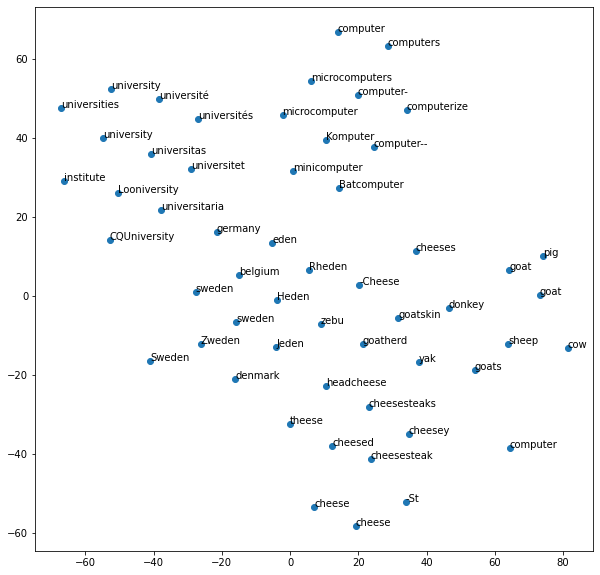

In [8]:
plot_most_similar(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

*We see clusters of similar words together based on their distances from each other after the TSNE transformation. What it doesn't tell us is the true 'dissimilarity' between these so called clusters. The algorithm essentially minimizes the KL-divergence between the joint probabilities of the similar words in the higher dimension vs lower dimension. It doesnt reflect if whether these clusters are as close to each other or not. The dimensionality transformation in t-SNE is different from PCA in the way the it doesn't conserve how far apart dissimilar points might be. The new axes will be based on relative distance separating the points which may not be a correct representation of how similar or dissimilar some of the words are.*

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [9]:
# TODO: Enter code here to solve the analogy problem

def fourth(x,y,z):
    result_vector = x.vector/np.linalg.norm(x.vector) - y.vector/np.linalg.norm(y.vector) + z.vector/np.linalg.norm(z.vector)
    key,_,_ = nlp.vocab.vectors.most_similar(result_vector.reshape(1,-1), n = 1)
    return nlp.vocab[key[0]]
     

#def fourth1(x,y,z):
#    result_vector = x.vector - y.vector + z.vector
#    result = most_similar(result_vector)
#    return result[1]

Test your code by running the following code. You should get *sister*.

In [10]:
fourth(nlp.vocab['brother'], nlp.vocab['man'], nlp.vocab['woman']).text

'sister'

You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

In [11]:
print(fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text)
#print(fourth1(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text)

Berlin


In [12]:
print(fourth(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text)
#print(fourth1(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text)

French


In [13]:
print(fourth(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text)
#print(fourth1(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text)

worse


In [14]:
print(fourth(nlp.vocab['walked'], nlp.vocab['walk'], nlp.vocab['take']).text)
#print(fourth1(nlp.vocab['walked'], nlp.vocab['walk'], nlp.vocab['take']).text)

took


In [31]:
print(fourth(nlp.vocab['king'], nlp.vocab['male'], nlp.vocab['female']).text) #expect queen
print(fourth(nlp.vocab['puppy'], nlp.vocab['dog'], nlp.vocab['cat']).text) #expect kitten
print(fourth(nlp.vocab['book'], nlp.vocab['read'], nlp.vocab['movie']).text) #expect watch
print(fourth(nlp.vocab['eat'], nlp.vocab['food'], nlp.vocab['drink']).text) #expect drink
print(fourth(nlp.vocab['Egypt'], nlp.vocab['pyramid'], nlp.vocab['France']).text) #expect eiffel tower

king
puppy
movie
eat
France


In [16]:
print(fourth(nlp.vocab['eyes'], nlp.vocab['eye'], nlp.vocab['tooth']).text) #expect teeth
print(fourth(nlp.vocab['children'], nlp.vocab['child'], nlp.vocab['dog']).text) #expect dogs

teeth
dogs


*After testing quite vigorously, we come to the conclusion that word embeddings work well only with close similarity between words. To elaborate, we tried very simple analogies like the default set given in the lab which works because there is a similarity between words being considered for drawing the analogy. When we tried some more common analogies, the model fails spectaculrly because the words we using to build the analogy are not similar. This was checked by first check most_similar words for the words we use in the analogy. Only if we use very similar words is when we get a good output analogy.*

**After your feedback we tried to change the man-woman analogy to male-female but our results are still inaccurate.**

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [17]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [18]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [19]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

Xtrain = df_train[['sentence1','sentence2','tags1','tags2']]
Ytrain = df_train['gold_label']

Xtest = df_dev[['sentence1','sentence2','tags1','tags2']]
Ytest = df_dev['gold_label']

DC = DummyClassifier(strategy = 'stratified') 
DC.fit(Xtrain, Ytrain)

predictions = DC.predict(Xtest)

print(classification_report(Ytest, predictions))


               precision    recall  f1-score   support

contradiction       0.34      0.34      0.34      3278
   entailment       0.34      0.34      0.34      3329
      neutral       0.33      0.34      0.34      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [20]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_OSB = Pipeline([
    ('vector', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter = 1000)),])

pipe_OSB.fit(Xtrain.sentence1, Ytrain)
pred_OSB_s1 = pipe_OSB.predict(Xtest.sentence1)
print(classification_report(Ytest, pred_OSB_s1))

pipe_OSB.fit(Xtrain.sentence2, Ytrain)
pred_OSB_s2 = pipe_OSB.predict(Xtest.sentence2)
print(classification_report(Ytest, pred_OSB_s2))

               precision    recall  f1-score   support

contradiction       0.33      0.25      0.28      3278
   entailment       0.33      0.34      0.34      3329
      neutral       0.33      0.40      0.36      3235

     accuracy                           0.33      9842
    macro avg       0.33      0.33      0.33      9842
 weighted avg       0.33      0.33      0.33      9842

               precision    recall  f1-score   support

contradiction       0.60      0.60      0.60      3278
   entailment       0.59      0.65      0.62      3329
      neutral       0.62      0.56      0.59      3235

     accuracy                           0.60      9842
    macro avg       0.60      0.60      0.60      9842
 weighted avg       0.60      0.60      0.60      9842



*Sentence2 is the better predictor as compared to sentence1. Its hard to say why this would be the case because we are comparing the results of 2 different training models. Essentially in this comparison sentence 1 & sentence 2 are independent of each other with respect to the gold standard labels. Upon manual inspection of the data set we can hypothesize that sentence2 may contain shorter and brief sentences which may have some impact on how the classifier performs.*

## Problem 5: A classifier based on manually engineered features

[Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self, row):
        sen1 = row.sentence1.split()
        sen2 = row.sentence2.split()
        tags1 = row.tags1.split()
        tags2 = row.tags2.split()
        
        cross_unigrams = []
        
        for i in range(len(sen1)):
            for j in range(len(sen2)):
                if tags1[i] == tags2[j]: 
                    cross_unigrams.append(sen1[i]+ "_" + sen2[j])
        result = ' '.join(cross_unigrams)
        result += ' '.join(sen2) #FIXED!!
        return result

    def transform(self, X):
        return [self._transform(row) for row in X.itertuples()]

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [22]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.

pipe_CU = Pipeline([
    ('cross-uni', CrossUnigramsTransformer()),
    ('vector', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter = 1000)),
    ])

pipe_CU.fit(df_train, df_train.gold_label)
predictions_CU = pipe_CU.predict(df_dev)

print(classification_report(df_dev.gold_label, predictions_CU))

               precision    recall  f1-score   support

contradiction       0.68      0.65      0.67      3278
   entailment       0.64      0.71      0.67      3329
      neutral       0.63      0.58      0.60      3235

     accuracy                           0.65      9842
    macro avg       0.65      0.65      0.65      9842
 weighted avg       0.65      0.65      0.65      9842



## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [23]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        # TODO: Replace the following line with your own code
        CBOW = 0
        for word in sentence.split():
            CBOW += nlp.vocab[word].vector           
        return CBOW

    # Vectorize a single row of the dataframe.
    def _transform2(self, row):
        # TODO: Replace the following line with your own code
        return np.concatenate((self._transform1(row.sentence1), self._transform1(row.sentence2)))

    def transform(self, X):
        return np.concatenate(
            [self._transform2(row).reshape(1, -1) for row in X.itertuples()]
        )

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [24]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.
from sklearn.neural_network import MLPClassifier

pipe_MLP = Pipeline([
    ('vector', PairedSentenceVectorizer()),
    ('classifier', MLPClassifier(hidden_layer_sizes = (300, 300, 300), 
                                 max_iter = 8)),])

pipe_MLP.fit(df_train, df_train.gold_label)
predictions_MLP = pipe_MLP.predict(df_dev)

print(classification_report(df_dev.gold_label, predictions_MLP))

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


               precision    recall  f1-score   support

contradiction       0.56      0.47      0.51      3278
   entailment       0.55      0.66      0.60      3329
      neutral       0.56      0.54      0.55      3235

     accuracy                           0.56      9842
    macro avg       0.56      0.55      0.55      9842
 weighted avg       0.56      0.56      0.55      9842



## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [25]:
# TODO: Enter your code for the full experiments here
import bz2
import pandas as pd

final_evaluation = True    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))
    
   

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [26]:
DC = DummyClassifier(strategy = 'stratified') 
DC.fit(df_train[['sentence1','sentence2','tags1','tags2']], df_train['gold_label'])

predictions = DC.predict(df_dev[['sentence1','sentence2','tags1','tags2']])

print(classification_report(df_dev['gold_label'], predictions))

               precision    recall  f1-score   support

contradiction       0.33      0.34      0.34      3278
   entailment       0.35      0.34      0.34      3329
      neutral       0.34      0.34      0.34      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



In [27]:
pipe_OSB = Pipeline([
    ('vector', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter = 1000)),])

pipe_OSB.fit(df_train.sentence1, df_train.gold_label)
pred_OSB_s1 = pipe_OSB.predict(df_dev.sentence1)
print(classification_report(df_dev.gold_label, pred_OSB_s1))

pipe_OSB.fit(df_train.sentence2, df_train.gold_label)
pred_OSB_s2 = pipe_OSB.predict(df_dev.sentence2)
print(classification_report(df_dev.gold_label, pred_OSB_s2))

               precision    recall  f1-score   support

contradiction       0.34      0.25      0.29      3278
   entailment       0.34      0.39      0.36      3329
      neutral       0.33      0.36      0.35      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.33      9842
 weighted avg       0.34      0.34      0.33      9842



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

contradiction       0.65      0.63      0.64      3278
   entailment       0.64      0.72      0.68      3329
      neutral       0.67      0.60      0.63      3235

     accuracy                           0.65      9842
    macro avg       0.65      0.65      0.65      9842
 weighted avg       0.65      0.65      0.65      9842



In [28]:
pipe_CU = Pipeline([
    ('cross-uni', CrossUnigramsTransformer()),
    ('vector', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter = 1000)),
    ])

pipe_CU.fit(df_train, df_train.gold_label)
predictions_CU = pipe_CU.predict(df_dev)

print(classification_report(df_dev.gold_label, predictions_CU))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

contradiction       0.78      0.76      0.77      3278
   entailment       0.75      0.80      0.77      3329
      neutral       0.71      0.69      0.70      3235

     accuracy                           0.75      9842
    macro avg       0.75      0.75      0.75      9842
 weighted avg       0.75      0.75      0.75      9842



In [29]:
pipe_MLP = Pipeline([
    ('vector', PairedSentenceVectorizer()),
    ('classifier', MLPClassifier(hidden_layer_sizes = (300, 300, 300), 
                                 max_iter = 8)),])

pipe_MLP.fit(df_train, df_train.gold_label)
predictions_MLP = pipe_MLP.predict(df_dev)

print(classification_report(df_dev.gold_label, predictions_MLP))

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


               precision    recall  f1-score   support

contradiction       0.75      0.64      0.69      3278
   entailment       0.67      0.80      0.73      3329
      neutral       0.68      0.65      0.66      3235

     accuracy                           0.70      9842
    macro avg       0.70      0.70      0.70      9842
 weighted avg       0.70      0.70      0.70      9842



In [30]:
pipe_MLP = Pipeline([
    ('vector', PairedSentenceVectorizer()),
    ('classifier', MLPClassifier(hidden_layer_sizes = (300, 300, 300), 
                                 max_iter = 20)),])

pipe_MLP.fit(df_train, df_train.gold_label)
predictions_MLP = pipe_MLP.predict(df_dev)

print(classification_report(df_dev.gold_label, predictions_MLP))

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


               precision    recall  f1-score   support

contradiction       0.75      0.68      0.71      3278
   entailment       0.72      0.76      0.74      3329
      neutral       0.67      0.70      0.69      3235

     accuracy                           0.71      9842
    macro avg       0.72      0.71      0.71      9842
 weighted avg       0.72      0.71      0.71      9842



**Experiment results: [UPDATED]**

|Classifier/Baseline|Partial dataset acc%|Complete dataset acc%|Comments|
|---|---|---|---|
|Random Baseline|34%|34%|No change in the accuracy (expected as it is inherently random choice between 3 classes)|
|One sided baseline with sentence1|33%|34%|We saw no improvement in the accuracy here because sentence1 is not a significant contributor to the inferential classification|
|One sided baseline with sentence2|60%|65%|A significant improvement here which we expected because of the availability of a larger dataset for training|
|Manually Engineered Features classifier|65%|75%|After making the corerction to the code for the Cross Unigrams, we see a much better result here with significant improvements in both training and test|
|MLP classifier with CBOW|56%|70%|We observe a significant improvement vs the baseline but a drop in f1 score vs the manually engineered features classifier. The NN classifier performs much better with more data to train on as the f1 score vs the OSB was actually lower for smaller training data.|



## Reflection questions

The following reflection questions will help you prepare for the diagnostic test. Answer each of them in the form of a short text and put your answers in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 4.1:** In Problem&nbsp;3, you manipulated word vectors using addition and subtraction, getting intermediate vectors which are still valid embeddings. Consider the difference vector *Stockholm* $-$ *Sweden*. What does that vector intuitively represent? What words do you think it should be most similar to?

*Intuitively, the subtraction represents an association rule of sorts, where we fix the capital and take away the country and then apply this association rule to another country to get its capital.*

**RQ 4.2:** Manually engineering features is a fairly time-consuming task, but as shown in Problem&nbsp;5, can result in systems which are on par with embedding-based systems. Conversely, embedding-based systems avoid manual feature engineering, but often require significantly more computational resources. Looking at your results from Problem&nbsp;7, are embedding-based systems worth the extra resources in the context of this task?

**UPDATED: After correcting the code, we see that manually engineered features actually give us a much better result. Another thing we noted that MLP classifier takes a lot of time to train which is problematic also because the NN performs satisfactorily if it is fed enough training data. So there is the benefit of both training time as well as accuracy of classification results.**

**RQ 4.3:** Throughout the lab, you have been using pre-trained word vectors from spaCy. In Problem&nbsp;7, you used them to compute the *input* to a neural network. Another common pattern is to use them to initialize an *embedding layer* in a neural network. (Have a look at [this article](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/) if you are unfamiliar with that pattern.) Explain the difference between the two usage patterns. What advantages/disadvantages do they have?

*The difference between the 2 methods primarily is how the transformed inputs are subject to updation through backpropogation when using embedding layers. When training a CBOW classifier word embeddings are learned automatically whereby, the significance of the words in the document is optimized to the task at hand. In the case we've handled in this lab, the word embeddings are fixed and we are dependent on the embeddings in the large English language model in spaCy. Whereas, with embedding layers we can have more optimized embeddings with word associations being dealt with in the context of the SNLI corpus. So, the advantage of using embedding layers is flexibility of optimizing to the task at hand. While this makes embedding sound like the better option, the caveat lies in the case where we don't have enough training data. In such a case, the word embeddings maybe tuned very well to small training data, but when subject to test conditions, it may not fare so well. In such cases, having a 'general' set like that which spaCy provides can help us avoid generalization error. To conclude, we would say that embedding layers can be a good option even with limited data, if we mean to expose the classifier to a very specific or familiar test/validation data.*

*TODO: Enter your answers here*

**Congratulations on finishing L4! 👍**